# CLUSTERING

As part of the exercise, experiments will be carried out on both artificial and real data. The following functions are suitable for generating artificial data:

* `make_classification` - generates a given number of points (`n_samples`) belonging to a predefined number of classes (`n_classes`) in a feature space with a given number of dimensions (`n_features`) 

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

* `make_blobs` - generates a given number of normally distributed clusters (`centers`) containing a given number of points (`n_samples`) in a space with a given number of dimensions (`n_features`) 

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

In [32]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs, make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time
import pandas as pd

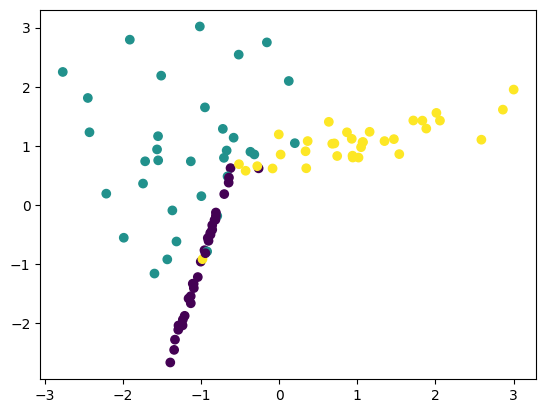

In [33]:
#x, y = make_blobs(n_features=2, centers=5)
x, y =  make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)
plt.scatter(x[:,0],x[:,1], c=y)
plt.show()

# k-means algorithm

The `KMeans` function groups the data into a given number of clusters (`n_clusters`). The algorithm is run a given number of times (parameter `n_init`, default 10) for different initial locations of cluster centers. Finally, the best solution is selected, i.e. the one for which the average distance of points from cluster centers is the smallest. The `get_params` attribute contains the method parameters. 

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [34]:
k_means = KMeans(n_clusters=3)
print(k_means.get_params)
t0 = time.time()
k_means.fit(x)
print("Training time: ", time.time() - t0)

<bound method BaseEstimator.get_params of KMeans(n_clusters=3)>
Training time:  0.025930166244506836


The final position of cluster centers may be read form `cluster_centers_` attribute.

In [35]:
k_means.cluster_centers_

array([[-0.98242619,  1.10126688],
       [ 1.22321789,  1.17488363],
       [-1.10986212, -1.08133197]])

After clustering, any data point can be assigned to the closest cluster using the `predict` method. 

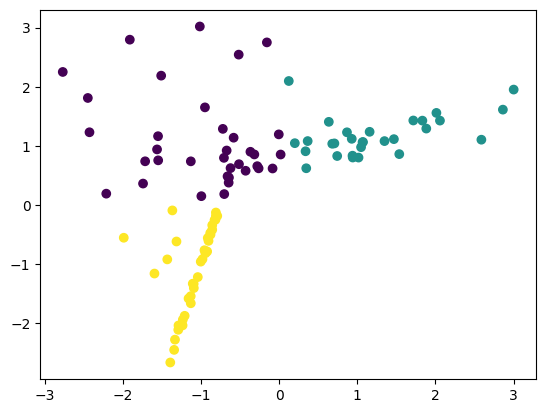

In [36]:
y_predict = k_means.predict(x)
plt.scatter(x[:,0],x[:,1],c = y_predict)
plt.show()

**Exercise 0**

Generate a few sample data sets with a different structure, in which the following situations will arise:
* a set containing several clusters with normal distributions;
* a set containing outlier examples;
* a set in which one of the classes is "stretched" (elongated).

To use the generated sets in further experiments, save them in files, e.g. in the following way: 

`pd.DataFrame(dane).to_csv("file1.csv", index=False)`

You may read the saved data using the following statement:

`dataset = pd.read_csv("file1.csv").values`

In [37]:
normal_dist_set, normal_dist_classes = make_blobs(n_samples=200, n_features=2, centers=3)
#Using flip to introduce outliers
outlier_set, outlier_classes = make_classification(n_samples=200, n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, flip_y=0.05)
streched_set, streched_classes = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=[1.0, 4.0, 1.0])
print(normal_dist_set)
print(outlier_set)
print(streched_set)



[[-4.53362341 -2.36877872]
 [-6.2545629  -0.71882613]
 [-7.28338263 -9.61572132]
 [-8.59197385 -9.04277851]
 [ 4.14031213 10.45364458]
 [ 2.79954597  7.20910652]
 [-7.732105   -8.40255005]
 [-6.42096205 -7.65406835]
 [-8.65954616 -8.33734738]
 [ 6.24299475  8.5626427 ]
 [-3.34721505  2.98985691]
 [-2.80335695 -0.82573977]
 [-7.63398201 -8.62665448]
 [-4.67373318 -0.34399634]
 [-6.98933146 -7.59506175]
 [ 3.42889751  8.76069725]
 [ 3.66618713 10.70751957]
 [-7.42365849 -7.29328777]
 [ 3.53907137  8.87398796]
 [-4.36688449 -0.59540219]
 [-7.67626136 -7.47926719]
 [-4.82994526 -0.76088068]
 [-8.75358337 -9.1426304 ]
 [-4.68705857  0.10914165]
 [-4.95259429 -0.74611757]
 [-4.69684961 -1.23588339]
 [-8.23178115 -8.42716502]
 [-7.82359691 -7.87430341]
 [ 3.83849193  8.43143192]
 [-7.1614064  -8.60296241]
 [-4.51269262 -0.25466027]
 [-7.51172286 -7.7769913 ]
 [-5.13363509  0.83981956]
 [-2.4349056   0.3962106 ]
 [-7.32391253 -9.20585178]
 [-4.27646033 -0.73153716]
 [-8.80786359 -8.73003708]
 

In [38]:
print(normal_dist_classes)

[0 0 1 1 2 2 1 1 1 2 0 0 1 0 1 2 2 1 2 0 1 0 1 0 0 0 1 1 2 1 0 1 0 0 1 0 1
 2 1 1 0 0 1 2 1 0 1 2 0 0 0 2 1 2 0 0 0 0 0 1 1 2 2 2 1 2 0 0 2 1 1 2 1 2
 2 1 2 1 2 1 1 0 0 2 1 0 1 2 1 0 0 1 1 0 2 0 0 2 2 1 1 1 0 1 2 1 1 2 0 0 1
 0 2 1 0 1 2 0 2 0 0 0 0 0 2 1 1 1 2 0 2 1 2 0 2 1 2 2 0 2 2 0 1 0 0 1 2 1
 2 0 2 1 2 2 2 1 1 0 0 1 2 1 2 2 2 2 2 2 2 2 0 2 1 2 2 0 2 2 2 2 0 0 1 0 0
 1 1 2 0 2 1 0 1 0 0 0 0 1 2 1]


In [39]:
import numpy as np
pd.DataFrame({'x': np.transpose(normal_dist_set)[0], 'y': np.transpose(normal_dist_set)[1], 'class': normal_dist_classes}).to_csv('normal_dist.csv', index=False)
pd.DataFrame({'x': np.transpose(outlier_set)[0], 'y': np.transpose(outlier_set)[1], 'class': outlier_classes}).to_csv('outlier_dist.csv', index=False)
pd.DataFrame({'x': np.transpose(streched_set)[0], 'y': np.transpose(streched_set)[1], 'class': streched_classes}).to_csv('streched_dist.csv', index=False)

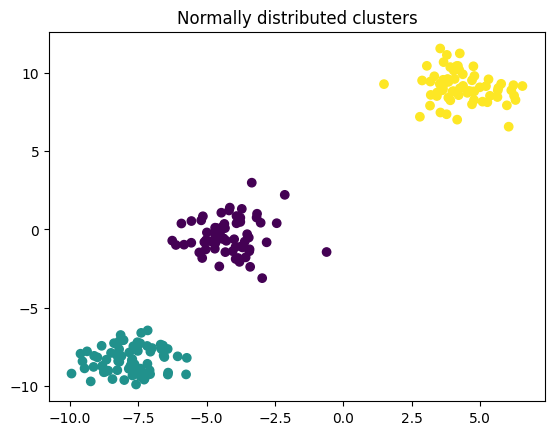

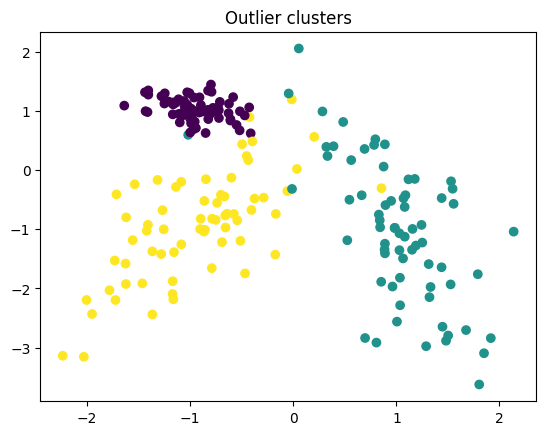

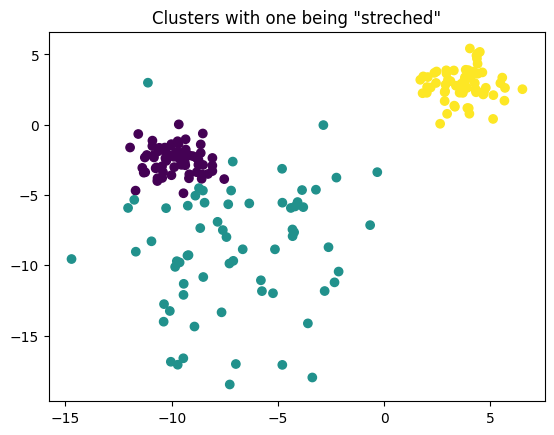

In [42]:
normal_dist_df = pd.read_csv('normal_dist.csv')
outlier_df = pd.read_csv('outlier_dist.csv')
streched_df = pd.read_csv('streched_dist.csv')
plt.scatter(normal_dist_df['x'], normal_dist_df['y'], c=normal_dist_df['class'])
plt.title('Normally distributed clusters')
plt.show()
plt.scatter(outlier_df['x'], outlier_df['y'], c=outlier_df['class'])
plt.title('Outlier clusters')
plt.show()
plt.title('Clusters with one being "streched"')
plt.scatter(streched_df['x'], streched_df['y'], c=streched_df['class'])
plt.show()

**Exercise 1 (1,5 pt)**

Perform k-means clustering for the generated data sets, determining in advance the number of clusters for each data set. Without changing the number of clusters, experiment with different values of the input parameters, which you can read about in the documentation. Investigate which of the input parameters of the method can positively affect the efficiency of the algorithm, both in terms of clustering quality and speed. As a measure of clustering quality, take the `inertia_` attribute, which is the sum of the squared distances of sample points from the cluster centers (the smaller the value, the better). As a measure of speed take the `n_iter` attribute which is the number of iterations performed. The results of the experiments should be visible, i.e. do not print the final conclusion only, but also the results leading to the conclusions. 

In [63]:
init_method_range = ['random', 'k-means++']
n_init_range = range(1, 10)
max_iter_range = range(1, 10)
#If you wish tosee nice plots of comparision of how the K-Means deal with clustering, you can uncomment every plt command, but please
#Remember to reduce the potential range of values chosen as input parameters as otherwise it will make 1200 plots :)
for init_method in init_method_range:
    for n_init_val in n_init_range:
        for max_iter_val in max_iter_range:
            print("K_MEANS DEFINED WITH:")
            print(f"\tInitialization method: {init_method}")
            print(f"\tn_init: {n_init_val}")
            print(f"\tmax_iter: {max_iter_val}")
            k_means = KMeans(n_clusters=3, init=init_method, n_init=n_init_val, max_iter=max_iter_val)
            t0 = time.time()
            k_means.fit(normal_dist_df.loc[:, ['x', 'y']])
            print(f'Normal dist training time: {(time.time() - t0) * 1000} ms')
            print(f'Normally distributed iterations: {k_means.n_iter_}')
            print(f'Normally distributed inertia: {k_means.inertia_} \n')
            #plt.subplot(3, 2, 1)
            #plt.scatter(normal_dist_df['x'], normal_dist_df['y'], c=normal_dist_df['class'])
            #plt.title('Actual normally distributed clusters')
            #plt.subplot(3, 2, 2)
            #plt.scatter(normal_dist_df['x'], normal_dist_df['y'], c=k_means.predict(normal_dist_df.loc[:, ['x', 'y']]))
            #plt.title('Predicted normally distributed clusters')

            t0 = time.time()
            k_means.fit(outlier_df.loc[:, ['x', 'y']])
            print(f'Outlier dist raining time: {(time.time() - t0) * 1000} ms')
            print(f'Outlier iterations: {k_means.n_iter_}')
            print(f'Outlier inertia: {k_means.inertia_} \n')
            #plt.subplot(3, 2, 3)
            #plt.scatter(outlier_df['x'], outlier_df['y'], c=outlier_df['class'])
            #plt.title('Actual outlier clusters')
            #plt.subplot(3, 2, 4)
            #plt.scatter(outlier_df['x'], outlier_df['y'], c=k_means.predict(outlier_df.loc[:, ['x', 'y']]))
            #plt.title('Predicted outlier clusters')

            t0 = time.time()
            k_means.fit(streched_df.loc[:, ['x', 'y']])
            print(f'Streched training time: {(time.time() - t0) * 1000} ms')
            print(f'Streched iterations: {k_means.n_iter_}')
            print(f'Streched inertia: {k_means.inertia_} \n')
            #plt.subplot(3, 2, 5)
            #plt.scatter(streched_df['x'], streched_df['y'], c=streched_df['class'])
            #plt.title('Actual clusters with one streched')
            #plt.subplot(3, 2, 6)
            #plt.scatter(streched_df['x'], streched_df['y'], c=k_means.predict(streched_df.loc[:, ['x', 'y']]))
            #plt.title('Predicted clusters with one streched')

            #plt.tight_layout()
            #plt.show()

K_MEANS DEFINED WITH:
	Initialization method: random
	n_init: 1
	max_iter: 1
Normal dist training time: 4.986286163330078 ms
Normally distributed iterations: 1
Normally distributed inertia: 1316.0091710495383 

Outlier dist raining time: 4.98652458190918 ms
Outlier iterations: 1
Outlier inertia: 288.28695594761604 

Streched training time: 4.98652458190918 ms
Streched iterations: 1
Streched inertia: 9081.606437845998 

K_MEANS DEFINED WITH:
	Initialization method: random
	n_init: 1
	max_iter: 2
Normal dist training time: 4.987001419067383 ms
Normally distributed iterations: 2
Normally distributed inertia: 382.24345463747164 

Outlier dist raining time: 4.98652458190918 ms
Outlier iterations: 2
Outlier inertia: 239.69506132142016 

Streched training time: 3.9894580841064453 ms
Streched iterations: 2
Streched inertia: 2338.7333181507083 

K_MEANS DEFINED WITH:
	Initialization method: random
	n_init: 1
	max_iter: 3
Normal dist training time: 4.98652458190918 ms
Normally distributed iterat

**Evaluating the quality of clustering**

There are some cluster validity indices.
1. If some labels are given (e.g. class assignements), you may apply Adjusted Round Index (ARI) (`sklearn.metrics.adjusted_rand_score`) taking values from [-1, 1].
2. if class assigment is not known (which is usually the case while performing clustering), you may apply silhouette coefficient (`sklearn.metrics.silhouette_score`) taking values from [-1, 1].

The description of all measures may be found at
http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [64]:
from sklearn import metrics
print("The value of ARI: ",metrics.adjusted_rand_score(y, y_predict)) 
print("The value of SILHOUETTE coefficient: ",metrics.silhouette_score(x, y_predict, metric='euclidean')) 

The value of ARI:  0.47580965414434173
The value of SILHOUETTE coefficient:  0.48334353299672217


**Excersise 2 (0,5 pt)**

For the generated data sets, plot a graph showing the relationship between the values of silhouette coefficient and the number of detected clusters. 

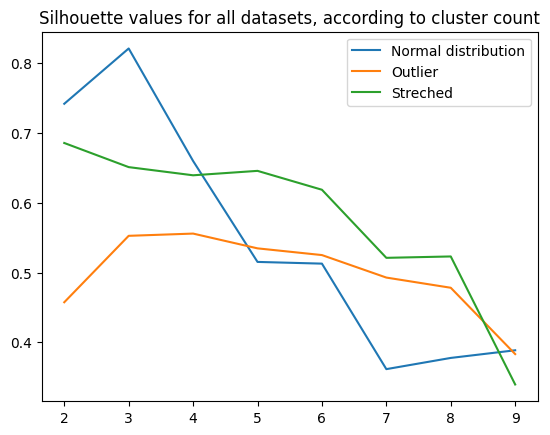

In [69]:
cluster_range = range(2, 10)
normal_dist_silhouette = []
outlier_silhouette = []
streched_silhouette = []
for cluster_count in cluster_range:
    k_means = KMeans(n_clusters=cluster_count)
    k_means.fit(normal_dist_df.loc[:, ['x', 'y']])
    normal_dist_silhouette.append(metrics.silhouette_score(normal_dist_df.loc[:, ['x', 'y']], k_means.predict(normal_dist_df.loc[:, ['x', 'y']]), metric='euclidean'))
    k_means.fit(outlier_df.loc[:, ['x', 'y']])
    outlier_silhouette.append(metrics.silhouette_score(outlier_df.loc[:, ['x', 'y']], k_means.predict(outlier_df.loc[:, ['x', 'y']]), metric='euclidean'))
    k_means.fit(streched_df.loc[:, ['x', 'y']])
    streched_silhouette.append(metrics.silhouette_score(streched_df.loc[:, ['x', 'y']], k_means.predict(streched_df.loc[:, ['x', 'y']]), metric='euclidean'))
plt.plot(cluster_range, normal_dist_silhouette, label='Normal distribution')
plt.plot(cluster_range, outlier_silhouette, label='Outlier')
plt.plot(cluster_range, streched_silhouette, label='Streched')
plt.title("Silhouette values for all datasets, according to cluster count")
plt.legend()
plt.show()

# Hierarchical clustering

The first experiments will be performed on the `digits` dataset. In order to be able to demonstrate the clustering results on a 2D plot, the `digits` data will first be transformed into two-dimensional space. 

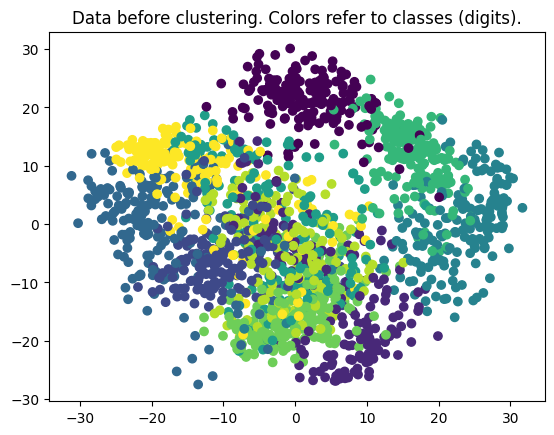

In [70]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
X_2D = PCA(n_components=2).fit_transform(X) #transforming multidimensional data to 2D
plt.title("Data before clustering. Colors refer to classes (digits).")
plt.scatter(X_2D[:,0], X_2D[:,1],c=y)
plt.show()

Hierarchical clustering may be performed using `AgglomerativeClustering` function.

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html


Parameter `linkage` defines the way a distance between clusters is calculated. It can be as follows:
* `ward` - minimizing variance of the clusters;
* `average` - average distance between pairs of points from two clusters;
* `complete` - maximum distance between pairs of points from two clusters;
* `single` - minimum distance between pairs of points from two clusters.

See below how the method works for `digits` data for the above four cases. 


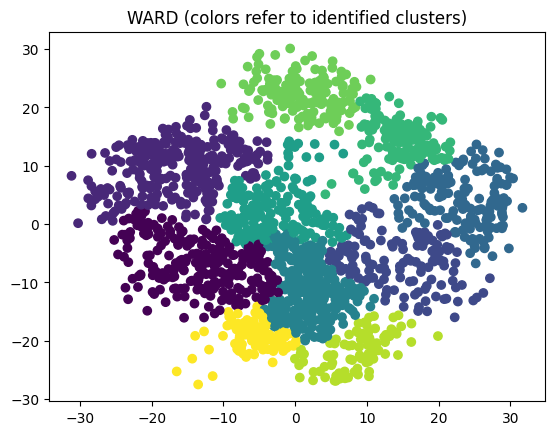

In [71]:
h = AgglomerativeClustering(linkage='ward', n_clusters=10)
h.fit(X_2D)
plt.title("WARD (colors refer to identified clusters)")
plt.scatter(X_2D[:,0], X_2D[:,1],c=h.labels_)
plt.show()

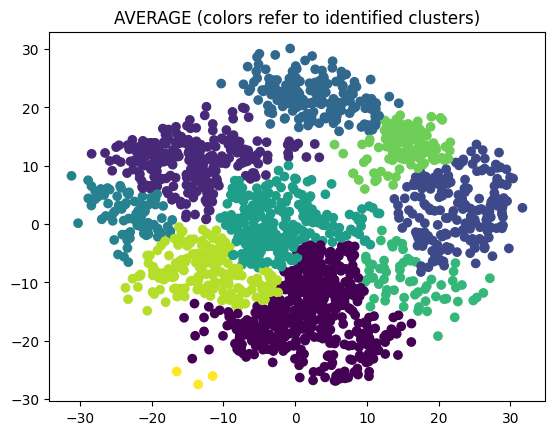

In [72]:
h = AgglomerativeClustering(linkage='average', n_clusters=10)
h.fit(X_2D)
plt.title("AVERAGE (colors refer to identified clusters)")
plt.scatter(X_2D[:,0], X_2D[:,1],c=h.labels_)
plt.show()

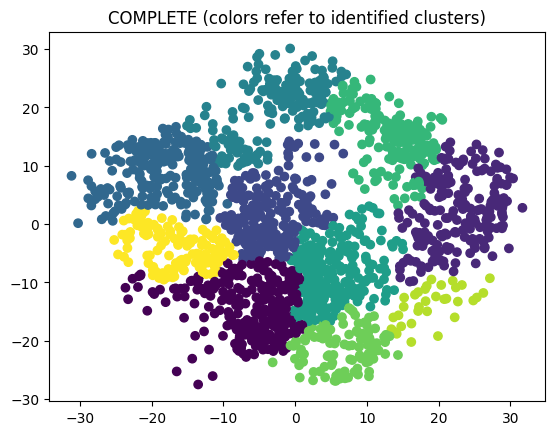

In [73]:
h = AgglomerativeClustering(linkage='complete', n_clusters=10)
h.fit(X_2D)
plt.title("COMPLETE (colors refer to identified clusters)")
plt.scatter(X_2D[:,0], X_2D[:,1],c=h.labels_)
plt.show()

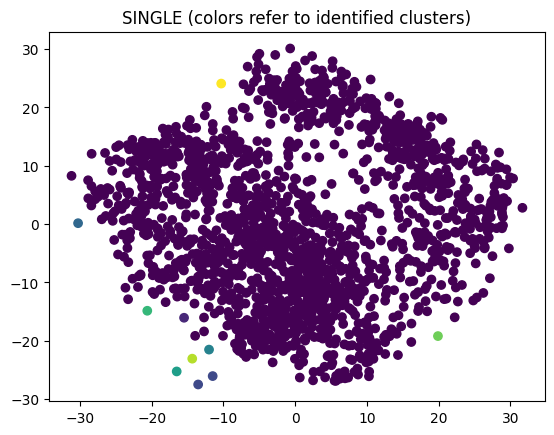

In [74]:
h = AgglomerativeClustering(linkage='single', n_clusters=10)
h.fit(X_2D)
plt.title("SINGLE (colors refer to identified clusters)")
plt.scatter(X_2D[:,0], X_2D[:,1],c=h.labels_)
plt.show()

**Excercise 3 (0,5 pt)**

For the above four clustering results obtained for digits data, calculate the value of Adjusted Round Index (ARI) (`sklearn.metrics.adjusted_rand_score`) to evaluate the consistency of the obtained clustering and real labels. Print and comment  the results.

In [79]:
linkage_values = ['ward', 'average', 'complete', 'single']
for linkage_value in linkage_values:
    h = AgglomerativeClustering(linkage=linkage_value, n_clusters=10)
    h.fit(X_2D)
    print(f"Value of ARI for linkage '{linkage_value}' is equal to {metrics.adjusted_rand_score(labels_true=y, labels_pred=h.labels_)}")

Value of ARI for linkage 'ward' is equal to 0.34276150187562765
Value of ARI for linkage 'average' is equal to 0.34805121024010854
Value of ARI for linkage 'complete' is equal to 0.30384596968601213
Value of ARI for linkage 'single' is equal to -3.056732196900473e-06


**Excercise 4 (1 pt)**

Perform hierarchical clustering for your data sets. Compare the performance of the four versions of hierarchical clustering. Can you explain in what situations each variant performs better than other ones (write down your observations)?

In [81]:
for linkage_value in linkage_values:
    h = AgglomerativeClustering(linkage=linkage_value, n_clusters=3)
    h.fit(normal_dist_df.loc[:, ['x', 'y']])
    print(f"Value of ARI for linkage '{linkage_value}' for normally distributed data is equal to {metrics.adjusted_rand_score(labels_true=normal_dist_df['class'], labels_pred=h.labels_)}")
    h.fit(outlier_df.loc[:, ['x', 'y']])
    print(f"Value of ARI for linkage '{linkage_value}' for data with outliers is equal to {metrics.adjusted_rand_score(labels_true=outlier_df['class'], labels_pred=h.labels_)}")
    h.fit(streched_df.loc[:, ['x', 'y']])
    print(f"Value of ARI for linkage '{linkage_value}' for one streched cluster is equal to {metrics.adjusted_rand_score(labels_true=streched_df['class'], labels_pred=h.labels_)}")
    print("")

Value of ARI for linkage 'ward' for normally distributed data is equal to 1.0
Value of ARI for linkage 'ward' for data with outliers is equal to 0.6772393056582955
Value of ARI for linkage 'ward' for one streched cluster is equal to 0.8224051736206764

Value of ARI for linkage 'average' for normally distributed data is equal to 1.0
Value of ARI for linkage 'average' for data with outliers is equal to 0.6772393056582955
Value of ARI for linkage 'average' for one streched cluster is equal to 0.5579084030979988

Value of ARI for linkage 'complete' for normally distributed data is equal to 1.0
Value of ARI for linkage 'complete' for data with outliers is equal to 0.5065988873035634
Value of ARI for linkage 'complete' for one streched cluster is equal to 0.6126382047308003

Value of ARI for linkage 'single' for normally distributed data is equal to 1.0
Value of ARI for linkage 'single' for data with outliers is equal to -0.0002985589618080458
Value of ARI for linkage 'single' for one strech

**Excercise 5 (0,5 pt)**

For one of the hierarchical methods (`single`, `complete` or `average`) and one of data sets (either you own data set or `digits`) compare the results of the method using various distance measures: `euclidean`, `manhattan`, `cosine` (`affinity` parameter). Write down your observations. 

In [83]:
distance_measure_range = ['euclidean', 'manhattan', 'cosine']
linkage_values = ['average', 'complete', 'single']
for distance_measure in distance_measure_range:
    print(f"USING DISTANCE MEASURE: {distance_measure}")
    for linkage_value in linkage_values:
        h = AgglomerativeClustering(affinity=distance_measure, linkage=linkage_value, n_clusters=3)
        h.fit(normal_dist_df.loc[:, ['x', 'y']])
        print(f"Value of ARI for linkage '{linkage_value}' for normally distributed data is equal to {metrics.adjusted_rand_score(labels_true=normal_dist_df['class'], labels_pred=h.labels_)}")
        h.fit(outlier_df.loc[:, ['x', 'y']])
        print(f"Value of ARI for linkage '{linkage_value}' for data with outliers is equal to {metrics.adjusted_rand_score(labels_true=outlier_df['class'], labels_pred=h.labels_)}")
        h.fit(streched_df.loc[:, ['x', 'y']])
        print(f"Value of ARI for linkage '{linkage_value}' for one streched cluster is equal to {metrics.adjusted_rand_score(labels_true=streched_df['class'], labels_pred=h.labels_)}")
        print("")

USING DISTANCE MEASURE: euclidean
Value of ARI for linkage 'average' for normally distributed data is equal to 1.0
Value of ARI for linkage 'average' for data with outliers is equal to 0.6772393056582955
Value of ARI for linkage 'average' for one streched cluster is equal to 0.5579084030979988

Value of ARI for linkage 'complete' for normally distributed data is equal to 1.0
Value of ARI for linkage 'complete' for data with outliers is equal to 0.5065988873035634
Value of ARI for linkage 'complete' for one streched cluster is equal to 0.6126382047308003

Value of ARI for linkage 'single' for normally distributed data is equal to 1.0
Value of ARI for linkage 'single' for data with outliers is equal to -0.0002985589618080458
Value of ARI for linkage 'single' for one streched cluster is equal to 0.5634589458817487

USING DISTANCE MEASURE: manhattan
Value of ARI for linkage 'average' for normally distributed data is equal to 1.0
Value of ARI for linkage 'average' for data with outliers is 

**Analysis of the obtained hierarchical structure of clustering**

It is possible to analyze the structure of clustering from attribute `children_`. The structure description will be analysed below for an example data set.

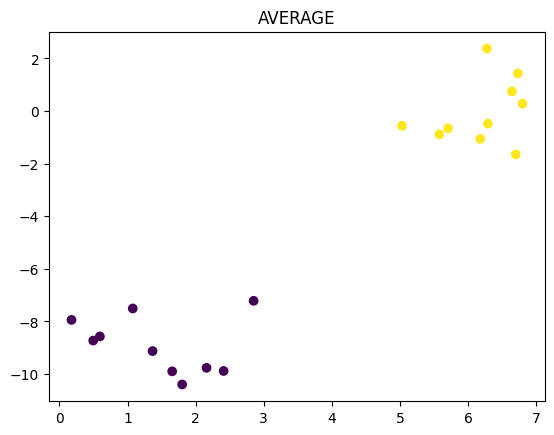

array([[ 1,  9],
       [ 2,  7],
       [ 0, 16],
       [ 6,  8],
       [ 3, 12],
       [10, 11],
       [13, 21],
       [22, 24],
       [19, 20],
       [25, 26],
       [15, 23],
       [18, 27],
       [17, 28],
       [14, 29],
       [ 5, 30],
       [31, 32],
       [33, 34],
       [ 4, 35],
       [36, 37]])

In [84]:
x, y = make_blobs(n_samples = 20, n_features=2, centers=2)
h = AgglomerativeClustering(linkage='average', n_clusters=2)
h.fit(x)
plt.title("AVERAGE")
plt.scatter(x[:,0], x[:,1],c=h.labels_)
plt.show()
h.children_

The number of rows in `children_` array is one less than the number of elements in the data set. Subsequent rows correspond to iterations of the algorithm and they contain indices of joined elements. In our example there are 20 samples in the data set. If a value lower than 20 appears in the array, it means a sample of that index is linked in the given iteration. Values greater than 20 are indices of clusters that contain more than one sample. The index of a cluster created in a given iteration is equal to the index of the row increased by the number of elements in the set. For example, if in the third row of the aray we had [5,11], it would mean that in the third iteration samples 5 and 11 were combined into one cluster, which was assigned index 22 (2 + 20).

Hierarchical clustering has been also implemented in `scipy` package. In this case a dendrogram may be also drawn.

In [ ]:
from scipy.cluster import hierarchy
h2 = hierarchy.average(x)
den = hierarchy.dendrogram(h2, no_labels=True)
plt.show()

**Excercise 6 (2 pt)**

On the basis of hierarchical clustering, propose and implement your own method of detecting outliers. Outliers are data samples that do not match the rest of the set. Briefly describe the idea of your method. Test it on example sets of two-dimensional data created by you in Excercise 0 and present the results on a scatter plot (e.g. highlight the detected unusual examples with a different color).

# DBSCAN algorithm

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=3)
dbscan.fit(X_2D) #X_2D - digits data previously transformed to 2D

plt.title("DBSCAN")
plt.scatter(X_2D[:,0], X_2D[:,1],c = dbscan.labels_)
plt.show()

The clustering results (labels) are saved in `dbscan.labels_`. Label value -1 indicates that the corresponding point has not been assigned to any cluster, which means it's an outlier.

**Excercise 7 (1,5 pt)**

For each of your own sets of data perform DBSCAN clustering. In each case adjust the algorithm parameters (`eps`, `min_samples`) to obtain the desired number of clusters, i.e. the number you set while using `make_calssification` or `make_blobs` functions. Show the results on scatter plots.

In [ ]:
eps_range = range(1, 50)
min_samples_range = range(1, 50)
dbscan = DBSCAN()

# Clustering documents

We will be analyzing a collection of documents containing news from 20 newsgroups. To speed up the operation of the methods, we will limit to four selected categories (groups). Choose four categories by uncommenting them.

In [85]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
categories = [
    #'alt.atheism',
    'comp.graphics',
    #'comp.os.ms-windows.misc',
    #'comp.sys.ibm.pc.hardware',
    #'comp.sys.mac.hardware',
    'comp.windows.x',
    #'misc.forsale',
    #'rec.autos',
    #'rec.motorcycles',
    #'rec.sport.baseball',
    #'rec.sport.hockey',
    #'sci.crypt',
    'sci.electronics',
    #'sci.med',
    'sci.space',
    #'soc.religion.christian',
    #'talk.politics.guns',
    #'talk.politics.mideast',
    #'talk.politics.misc',
    #'talk.religion.misc'
]
dataset = fetch_20newsgroups(subset='all', categories = categories, shuffle=True, random_state=42)

In [86]:
print("The number of loaded documents is ", len(dataset.data))
print("They belong to one of ", len(dataset.target_names), " categories.")

The number of loaded documents is  3932
They belong to one of  4  categories.


Example news from the set is as follows:

In [87]:
doc_number = 5
print("Example news from ", dataset.target_names[dataset.target[doc_number]])
dataset.data[doc_number]

Example news from  comp.windows.x


"From: deloura@cs.unc.edu (Mark A. DeLoura)\nSubject: Looking for X Window Server Frequency-of-Operations Data\nOrganization: The University of North Carolina at Chapel Hill\nLines: 22\nNNTP-Posting-Host: monet.cs.unc.edu\nKeywords: Frequency data X Server architecture\n\nHello--  I'm currently designing the architecture of a chip which is\nintended to help speed up common operations on a windowing system such as\nX.  A friend and I are designing the chip as the final course project for\nan advanced computer architecture course taught by Dr. Fred Brooks at\nUNC-Chapel Hill.  While we feel that we've got a pretty solid design\ncurrently, we'd really like to get ahold of some frequency data from an\nX-Windows server so that we can make the most effective use of our bit\nbudget.  \n\nUnfortunately, I've been unable to find anything of this sort in the\nvarious X FAQs, or X manuals that I've seen.  Does anyone have some type of\nfrequency data, like how many Copy-rectangle operations vs dr

Each document will be represented by a feature vector whose components are weights for the words considered in the analyzed set of documents. Class `TfidfVectorizer` is used to calcualate these feature vectors.

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

The number of features describing documents may, in an extreme case, be equal to the number of all words appearing in all documents in the set.

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, max_features = None, stop_words='english')
X = vectorizer.fit_transform(dataset.data)
print("Number of documents: %d\nNumber of features: %d" %X.shape)

Number of documents: 3932
Number of features: 26227


For a given document, the i-th component of a feature vector is the number of occurrences of the i-th word (feature) in this document multiplied by the idf coefficient, which depends on the total number of documents in the set and the number of documents containing the i-th word. A detailed description of determining these features can be found in the documentation
http://scikit-learn.org/stable/modules/feature_extraction.html.
The vector of idf values for all words (features) can be read as follows:


In [89]:
vectorizer.idf_

array([4.15916396, 4.63276687, 7.4853983 , ..., 8.17854548, 7.89086341,
       7.89086341])

The `get_feature_names` method allows you to read the names of all features, i.e. the words taken into account when analyzing a set of documents. They are sorted alphabetically.

In [90]:
terms = vectorizer.get_feature_names()
terms[-20:-1]

c:\Users\Plec\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ztivax',
 'zu',
 'zug',
 'zulu',
 'zuma',
 'zurich',
 'zv',
 'zvi',
 'zw',
 'zw6f3b1w165w',
 'zwork',
 'zx',
 'zy',
 'zyda',
 'zyeh',
 'zyxel',
 'zz',
 'ªl',
 '³ation']

**Excercise 8 (1.5 pt)**


Choose one of the clustering methods you know, adjust its parameters and cluster documents from the given collection. Calculate the value of a selected cluster validity index.
1. for different number of clusters
2. for different number of features describing the documents (parameter `max_features`)

Adjust the values of the above two parameters (number of clusters, number of features) to obtain the best possible clustering (from the point of view of the selected cluster validity index). You may present the results of the analysis on plots.


In [ ]:
cluster_count_range = range(2, 50)
max_features_range = range(500, 25000, 500)
document_silhouette = []
for cluster_count in cluster_count_range:
    k_means=KMeans(n_clusters=cluster_count)
    k_means.fit(X)


**Excercise 9 (0,5 pt)**

For each detected cluster, display 10 most significant features (words), i.e. 10 words with the highest values for the corresponding features. When analyzing the feature values, take into account only the cluster centers which are good representatives of each group.

**Excercise 10 (0.5 pt)**

Enter a sample short text (2-3 sentences) on any topic. The text should be an element of an array. Convert the text to a feature vector (`vectorizer.transfom`). Verify which cluster this text is assigned to. Experiment with at  least three texts.